# M3 Lab1: Linear Regression in Real Estate

In [ ]:
# Install and import the library
%pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

plt.style.use('ggplot')

## Step 1: data processing

In [ ]:
# Load the eastville.csv dataset
df = pd.read_csv('eastville.csv')

# Explore dtype of variables
df_info = df.info()

# Examine missing values
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   house     108 non-null    int64 
 1   sqft      108 non-null    int64 
 2   beds      108 non-null    int64 
 3   baths     108 non-null    int64 
 4   heat      108 non-null    int64 
 5   style     108 non-null    object
 6   garage    108 non-null    int64 
 7   basement  108 non-null    int64 
 8   age       108 non-null    int64 
 9   fire      108 non-null    int64 
 10  price     108 non-null    int64 
 11  school    108 non-null    object
dtypes: int64(10), object(2)
memory usage: 10.2+ KB


house       0
sqft        0
beds        0
baths       0
heat        0
style       0
garage      0
basement    0
age         0
fire        0
price       0
school      0
dtype: int64

In [ ]:
# get descriptive statistics
df.describe()

,house,sqft,beds,baths,heat,garage,basement,age,fire,price
count,108.00000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,54.50000,1994.481481,3.601852,2.648148,0.138889,2.037037,0.842593,11.231481,0.805556,341394.629630
std,31.32092,443.710975,0.682763,0.552223,0.347443,0.332814,0.365882,4.655630,0.397618,82092.910396
min,1.00000,861.000000,3.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,197300.000000
25%,27.75000,1649.250000,3.000000,2.000000,0.000000,2.000000,1.000000,8.000000,1.000000,285017.500000
50%,54.50000,2034.500000,3.500000,3.000000,0.000000,2.000000,1.000000,11.000000,1.000000,331715.000000
75%,81.25000,2304.750000,4.000000,3.000000,0.000000,2.000000,1.000000,14.000000,1.000000,377335.000000
max,108.00000,3222.000000,6.000000,4.000000,1.000000,3.000000,1.000000,22.000000,1.000000,675030.000000


In [ ]:
# Eliminate the index column "house" from descriptive analytics
for var in ['house']:
   df[var] = df[var].astype('category')

In [ ]:
# Describe Qualitative Categories in Quantitative measure: Rename variables in school and style variables to graph easily
df['school'] = df['school'].replace({'Plum Ridge': 0, 'Apple Valley': 1})

df['style'] = df['style'].replace({'Cape Cod': 0, 'Two-story': 1, 'Ranch': 2})

## Step 2: Descriptive Analytics

,sqft,beds,baths,heat,style,garage,basement,age,fire,price,school
sqft,1.000000,0.255609,0.592660,0.182278,0.343864,0.420737,0.085613,-0.271834,0.261266,0.772090,0.228647
beds,0.255609,1.000000,0.393386,0.077700,0.093237,0.065501,0.195718,0.279177,0.056420,0.273369,0.024483
baths,0.592660,0.393386,1.000000,0.062241,0.495672,0.274973,0.185877,-0.124336,0.238828,0.521135,0.236426
heat,0.182278,0.077700,0.062241,1.000000,0.070513,-0.044901,0.026548,0.020382,0.129662,0.130148,0.053175
style,0.343864,0.093237,0.495672,0.070513,1.000000,0.185657,0.342325,-0.162412,0.106156,0.457826,0.388720
garage,0.420737,0.065501,0.274973,-0.044901,0.185657,1.000000,0.201822,-0.120186,0.196177,0.537683,0.148034
basement,0.085613,0.195718,0.185877,0.026548,0.342325,0.201822,1.000000,0.059996,0.044612,0.290414,0.219776
age,-0.271834,0.279177,-0.124336,0.020382,-0.162412,-0.120186,0.059996,1.000000,-0.131965,-0.370063,-0.187951
fire,0.261266,0.056420,0.238828,0.129662,0.106156,0.196177,0.044612,-0.131965,1.000000,0.253526,0.078327
price,0.772090,0.273369,0.521135,0.130148,0.457826,0.537683,0.290414,-0.370063,0.253526,1.000000,0.398351


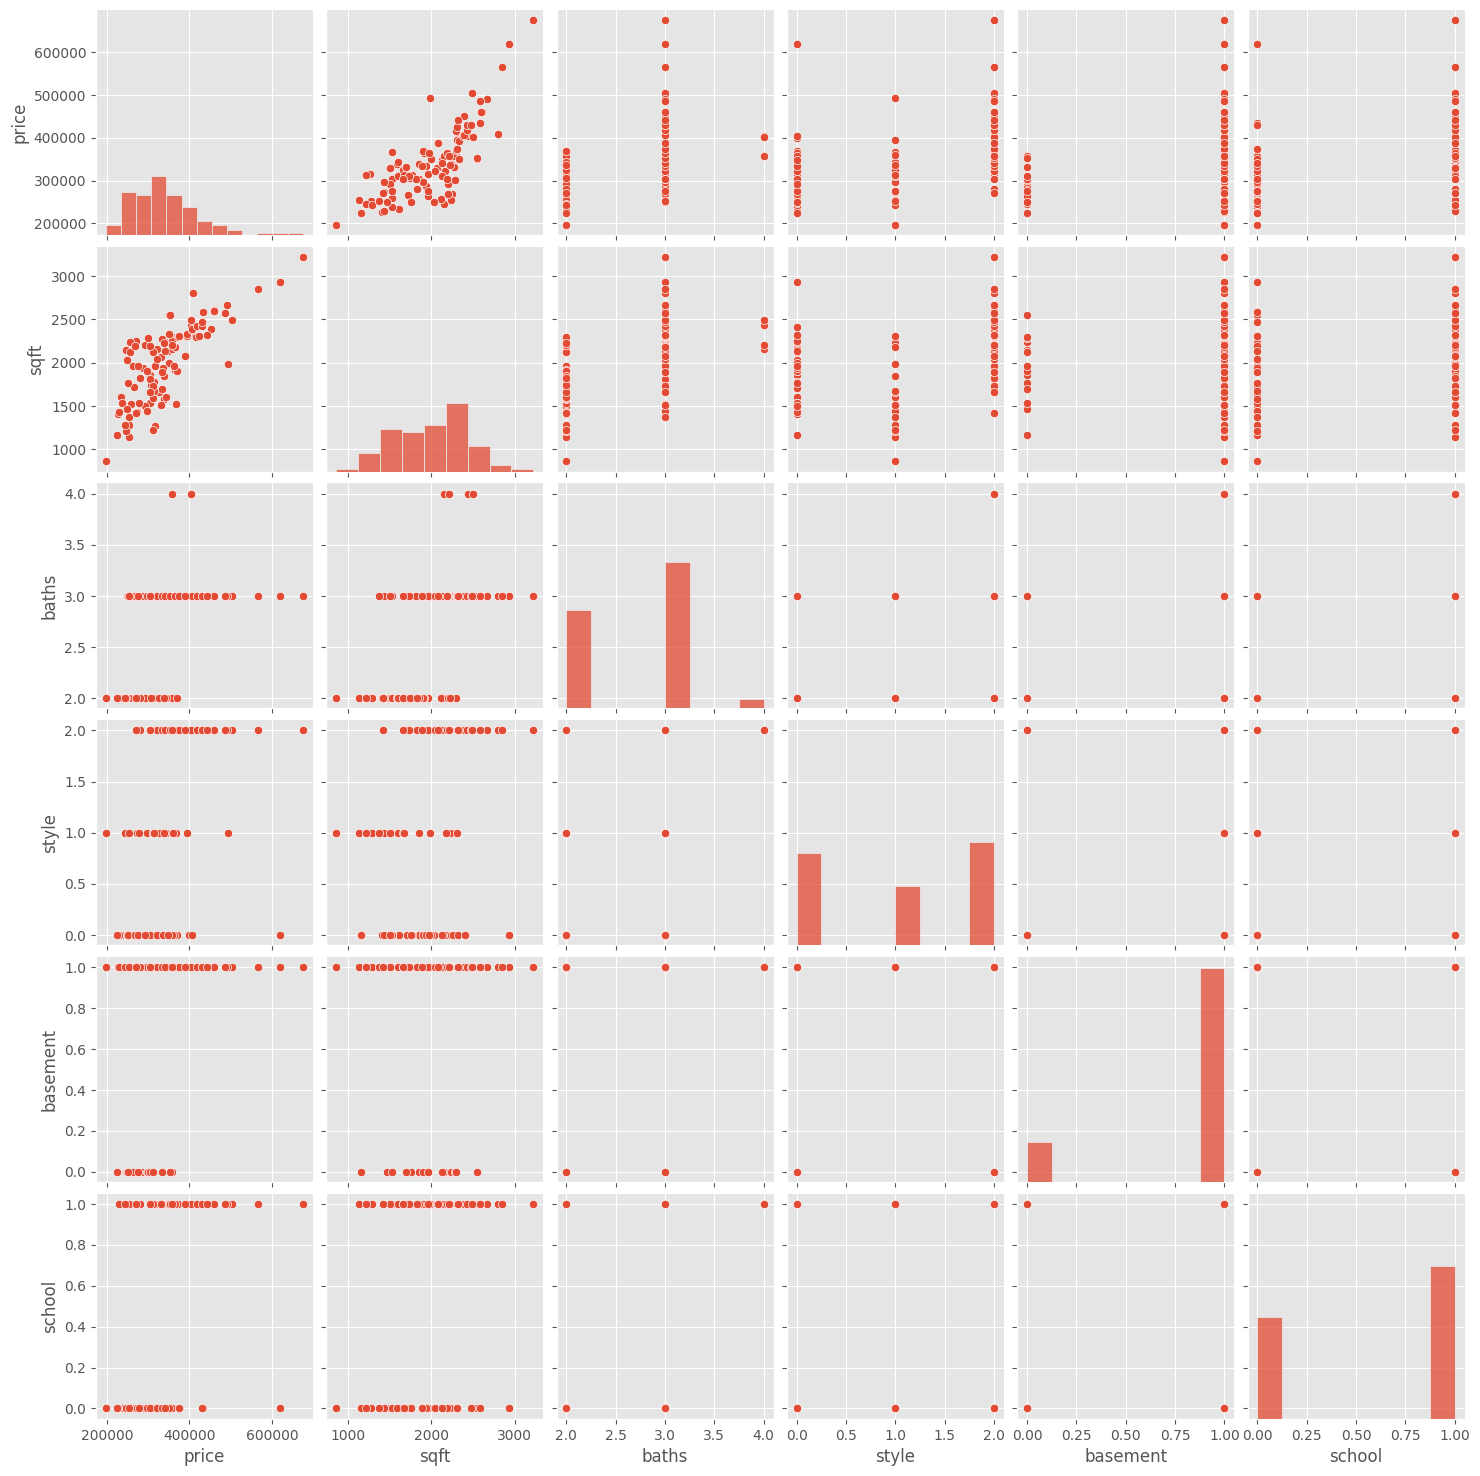

In [ ]:
# Examine the correlations between the following selected variables
sns.pairplot(data=df[['price','sqft','baths','style','basement','school']])

# describe the correlation between variables in tabular form using Pearson coefficient
df.corr(numeric_only=True)

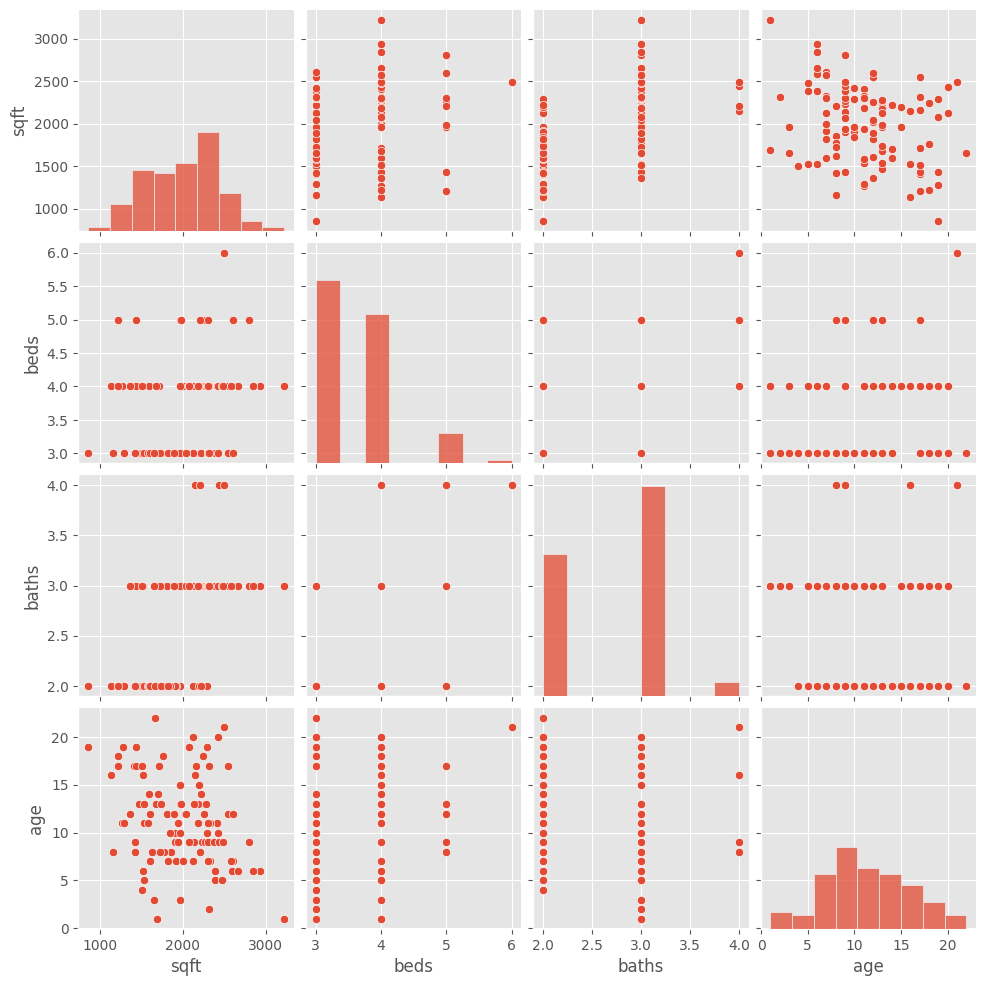

In [ ]:
# Among sqft, beds, baths, and age
sns.pairplot(df[['sqft', 'beds', 'baths', 'age']])
plt.show()

## Step 3: Develop multiple regression model

In [ ]:
# cast the following variables as `category`
for var in ['heat','style','fire','basement', 'school']:
    df[var] = df[var].astype('category')

In [ ]:
# conduct dummy variable transformation

df = df.drop(columns='house')

df_dummy = pd.get_dummies(
    data = df,
    drop_first = True,
    dtype = 'int8'
)

df_dummy.head()

,sqft,beds,baths,garage,age,price,heat_1,style_1,style_2,basement_1,fire_1,school_1
0,1610,3,2,1,12,234280,0,0,0,1,1,1
1,2151,3,2,2,13,246360,1,0,0,0,1,0
2,1718,4,2,2,17,265650,0,0,0,1,0,0
3,1534,3,2,2,11,237420,0,0,0,1,1,0
4,1527,3,2,1,6,259170,0,0,0,0,1,0


In [ ]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sqft        108 non-null    int64
 1   beds        108 non-null    int64
 2   baths       108 non-null    int64
 3   garage      108 non-null    int64
 4   age         108 non-null    int64
 5   price       108 non-null    int64
 6   heat_1      108 non-null    int8 
 7   style_1     108 non-null    int8 
 8   style_2     108 non-null    int8 
 9   basement_1  108 non-null    int8 
 10  fire_1      108 non-null    int8 
 11  school_1    108 non-null    int8 
dtypes: int64(6), int8(6)
memory usage: 5.8 KB


In [ ]:
# determine the X and Y predictors
y = df_dummy['price']
x = df_dummy.drop(columns='price')

# create the model to fit the data
x = sm.add_constant(x)

model = sm.OLS(y,x).fit()

# display the summary of the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     32.30
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           1.70e-27
Time:                        04:47:35   Log-Likelihood:                -1291.2
No. Observations:                 108   AIC:                             2606.
Df Residuals:                      96   BIC:                             2639.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.475e+04    3.3e+04     -1.053      0.2

In [ ]:
# determine the best fit for the data

while True:
    # rerun the model
    model = sm.OLS(y,x).fit()

    # get pvalues from the model
    model.pvalues.round(3)
    pvalues = model.pvalues
    # find the largest pvalue
    max_pvalues = pvalues.max()

    # use 5% (i.e. 0.05) as the threshold to compare against the model's largest pvalue
    if max_pvalues > 0.05:
        # identify and remove from regression
        insig_feature = pvalues.idxmax()
        x = x.drop(columns=insig_feature)
        print(f"{insig_feature} is removed due to a pvalue of {max_pvalues}")
    else:
        break

# print out the updated model
print(model.summary())

baths is removed due to a pvalue of 0.7220701170653316
heat_1 is removed due to a pvalue of 0.6470013757928748
fire_1 is removed due to a pvalue of 0.6009698120932738
const is removed due to a pvalue of 0.259143480192811
style_2 is removed due to a pvalue of 0.12450070587001427
beds is removed due to a pvalue of 0.12532836928465094
                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1363.
Date:                Wed, 22 Nov 2023   Prob (F-statistic):                    5.51e-95
Time:                        04:47:39   Log-Likelihood:                         -1294.8
No. Observations:                 108   AIC:                                      2602.
Df Residuals:                     102   BIC:      

## Step 4: Make prediction and comment on the quality of the prediction

40085.38689569714


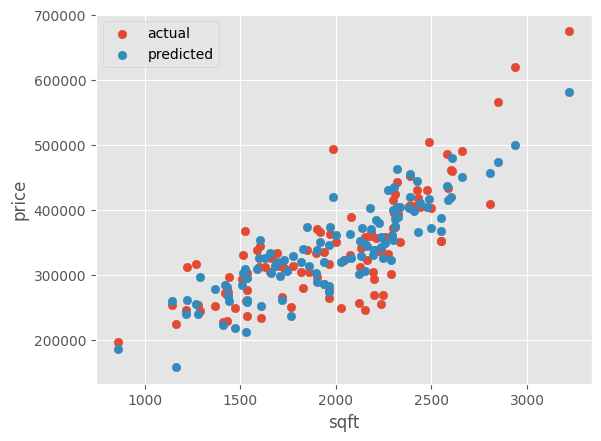

In [ ]:
# Get model prediction
y_pred = model.predict(x)
y_pred.tail()

# Evaluate model fit with R2
model.rsquared.round(3)

# Evaluate prediction accuracy with RMSE = SQRT(MSE)
print(model.mse_resid ** 0.5)

# visualization of actual and prediction
plt.scatter(x=df_dummy['sqft'], y=y, label='actual')
plt.scatter(x=df_dummy['sqft'], y=y_pred, label='predicted')
plt.xlabel("sqft")
plt.ylabel("price")
plt.legend()

In [ ]:
model.params.round(3)

sqft            127.858
garage        40526.055
age           -3851.942
style_1       41946.771
basement_1    26280.233
school_1      25832.724
dtype: float64